# PHY224 Circuits : Lightbulb

## Student Information
- Student Name: Percival Francis
- Partner Name: Justin Nicholson
- TA Name: Shaun

## Upload data files
Upload your data file (.csv file) that contains the data you measured and used in the experiment

## Question 1
Write the python code in the next box to load any needed data, fit models to the data, perform any additional calculations, and create the required plots. If you work in a Jupyter notebook you should submit include a PDF rendering of the notebook so that it can be graded. If you work in a Python text file (e.g. in Spyder or VS Code) you should upload the Python file separately to the figures and captions, and use the word file to attach figures and write captions.

In [2066]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Measured Resistance of the Resistor using an Ohmmeter:

In [2067]:
MEASURED_RESISTANCE = 67.38 # in ohms
MEASURED_ERROR = 1.3976 # in ohms

Values from CSV file:

In [2068]:
lightbulb_data = np.loadtxt("./data/lightbulb_data.csv", delimiter=',', comments='#', unpack=True, skiprows=2) # retrieve from csv.
voltage_data = lightbulb_data[0] # potential difference
ampere_data = lightbulb_data[1] # current
ohm_data = lightbulb_data[4] # resistance

voltage_error = lightbulb_data[2] # potential difference error
ampere_error = lightbulb_data[3] # current error
ohm_error = lightbulb_data[5] # resistance error

### Functions

Equation for Chi Squared Reduced:\
$\chi^2_r$ is calculated with this formula:
$$\chi^{2}_{r} = \frac{1}{v}\sum_{i=1}^{N} \left(\frac{y_i - f(x_i)}{u(x_i)}\right)^2$$

In [2069]:
# function for calculating chi squared reduced.
def chi_squared_reduced(y_measure, y_predict, errors, number_of_parameters):
    """Calculates the reduced chi squared of data, prediction and errors."""
    return (np.sum(((y_measure - y_predict) ** 2 )/ (errors ** 2)))/(y_measure.size - number_of_parameters)


### Model Functions

Equation for power law
$$f(V) = aV^b + c$$

Equation for logarithmic
$$\log{(f(V))} = log{(a)} + b\log{(V)}$$

Equation for idealized
$$f(V) = aV^{\frac{3}{5}}$$

In [2070]:
# function for power law model
def power_law(V, a, b, c):
    return a * (V ** b) + c

In [2071]:
# function for power law model
# V given to this equation should be ln(V)
def logarithmic(V, a, b):
    return np.log(a) + b * np.log(V)

In [2072]:
def idealized(V, a):
    return a * V ** (0.6)

Curve Fit

In [2073]:
# curve fit of power law using curve_fit
popt, pcov = curve_fit(power_law, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error)
pstd = np.sqrt(np.diag(pcov))
pstd

array([0.00425197, 0.43864655, 0.00596391])

In [2074]:
# curve fit of logarithmic using curve_fit
poptl, pcovl = curve_fit(power_law, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error/voltage_data)
pstdl = np.sqrt(np.diag(pcov))
pstdl

array([0.00425197, 0.43864655, 0.00596391])

In [2075]:
# curve fit of idealized using curve_fit
popti, pcovi = curve_fit(idealized, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error)
pstdi = np.sqrt(np.diag(pcov))
pstdi

array([0.00425197, 0.43864655, 0.00596391])

Other parameters

Power Law

In [2076]:
print("chi squared reduced =",chi_squared_reduced(ampere_data, power_law(voltage_data, popt[0], popt[1], popt[2]), voltage_error, len(popt)))
print(f"Values of: \na: {popt[0]}, \nb: {popt[1]}, \nc: {popt[2]}")
pvar = np.diag(pcov)
print(f"Uncertainty in: \na: {np.sqrt(pvar[0])}, \nb: {pvar[1]},\nc: {pvar[2]}")
# notice that b is approx 3/4, off from 3/5

chi squared reduced = 0.0005424040796750286
Values of: 
a: 0.0030536390138963727, 
b: 0.746010231583908, 
c: 0.0041927753539521126
Uncertainty in: 
a: 0.004251972260860279, 
b: 0.19241079420628884,
c: 3.5568215904609135e-05


Logarithmic

In [2077]:
print("chi squared reduced =",chi_squared_reduced(np.log(ampere_data), logarithmic(voltage_data, poptl[0], poptl[1]) + 0.003, voltage_error/voltage_data, len(popt)))
print(f"Values of: \na: {np.log(poptl[0])}, \nb: {poptl[1]}")
pvarl = np.diag(pcov)
print(f"Uncertainty in: \na: {np.sqrt(pvarl[0])}, \nb: {pvarl[1]}")


chi squared reduced = 51840.82356590182
Values of: 
a: -5.56430621086385, 
b: 0.6815474661706672
Uncertainty in: 
a: 0.004251972260860279, 
b: 0.19241079420628884


Idealized

In [2078]:
print("chi squared reduced =",chi_squared_reduced(ampere_data, idealized(voltage_data, popti[0]), voltage_error, len(popti)))
print(f"Values of: \na: {popti[0]}")
pvari = np.diag(pcovi)
print(f"Uncertainty in: \na: {np.sqrt(pvari[0])}")
# notice that b is approx 3/4, off from 3/5

chi squared reduced = 0.03833698446522124
Values of: 
a: 0.005484871070694499
Uncertainty in: 
a: 0.0004117784230693048


## Question 2
Plot the fit to the lightbulb data with linear axes.  In the next question you'll add a caption for this figure.
(if you made one file with multiple plots, it's easiest to upload the same file to both questions so that we don't miss anything when grading)


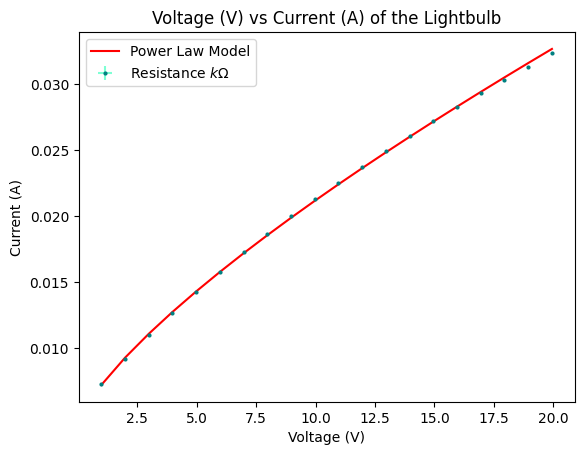

In [2079]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, power_law(voltage_data, popt[0], popt[1], popt[2]), label = "Power Law Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

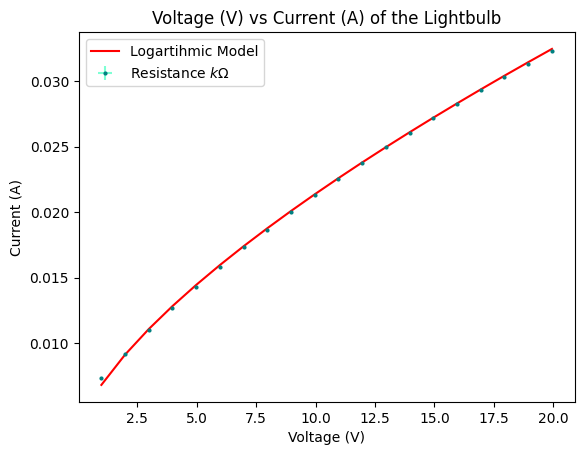

In [2080]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003, label = "Logartihmic Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

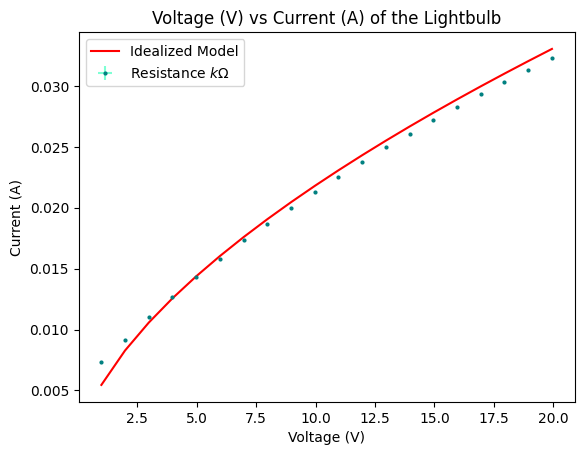

In [2081]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, idealized(voltage_data, popti[0]), label = "Idealized Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

Note: Error bars are too small to be seen

## Question 3

Write a suitable caption that describes the plot. You should include the meaning of each point or line on your plot, any quantities requested (exponent with uncertainty) with appropriate units. Include the regression coefficients.

A caption needs to explain what’s in the plot and how it relates the data and models. A person with some background in your experiment should be able to read the caption and understand the figure without needing critical information from somewhere else.

In [2082]:
#CAPTION

## Question 4
Plot the fit to the lightbulb data with logarithmic axes. In the next question you'll add a caption for this figure. 

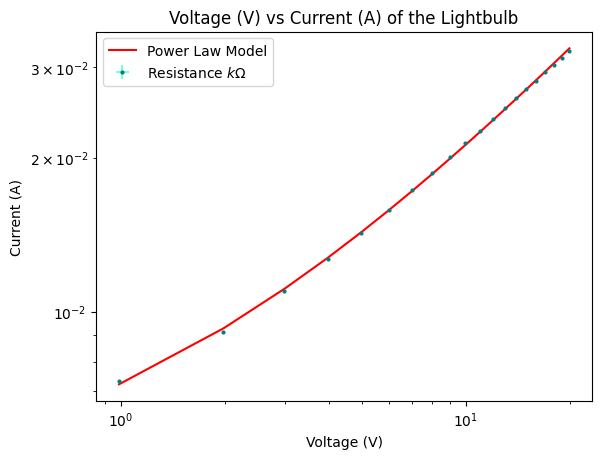

In [2083]:
# logarithmic version
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, power_law(voltage_data, popt[0], popt[1], popt[2]), label = "Power Law Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

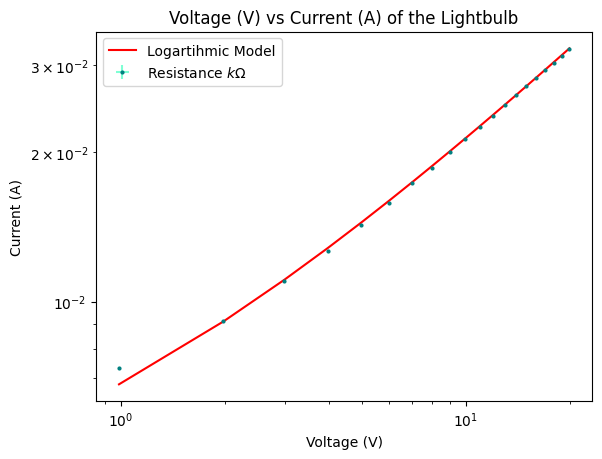

In [2084]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003, label = "Logartihmic Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

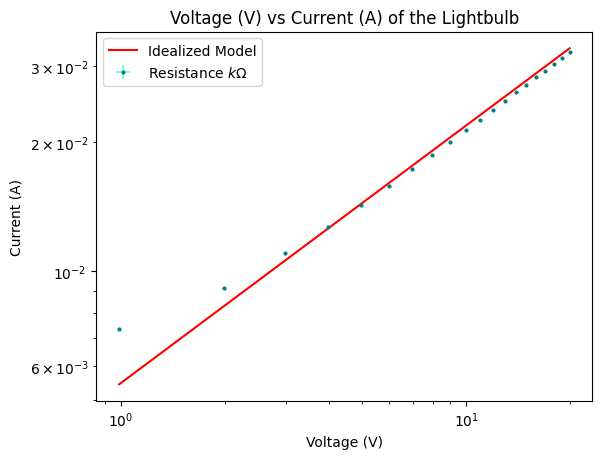

In [2085]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Resistance $k \Omega$')

plt.plot(voltage_data, idealized(voltage_data, popti[0]), label = "Idealized Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

## Question 5
Write a suitable caption that describes the plot. You should include the meaning of each point or line on your plot, any quantities requested (exponent with uncertainty) with appropriate units. Include the regression coefficients.

A caption needs to explain what’s in the plot and how it relates the data and models. A person with some background in your experiment should be able to read the caption and understand the figure without needing critical information from somewhere else.

In [2086]:
#CAPTION

## Question 6
Plot the residual plot of your model fit. In the next question you will add a caption for this figure. 


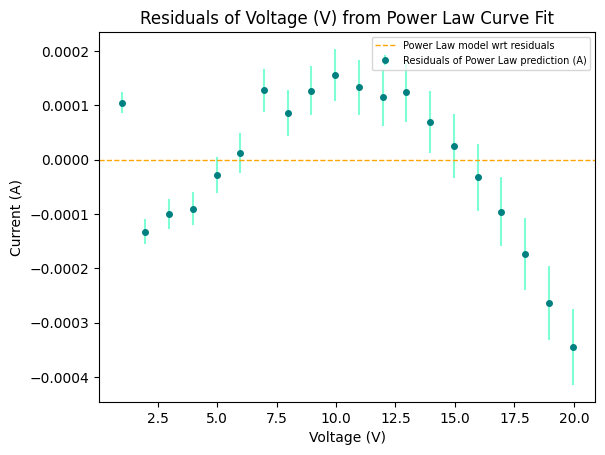

In [2087]:
#PLOT

# residuals
residuals = ampere_data - power_law(voltage_data, popt[0], popt[1], popt[2])


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Power Law prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Power Law model wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Power Law Curve Fit')
plt.legend(fontsize=7)
plt.show()

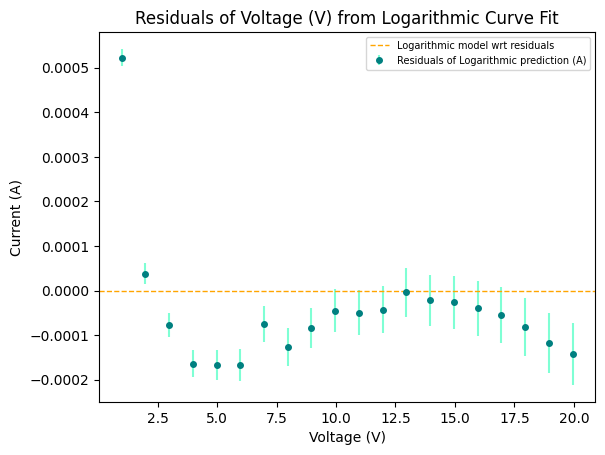

In [2088]:
# residuals
residuals = ampere_data - (np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003)


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Logarithmic prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Logarithmic model wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Logarithmic Curve Fit')
plt.legend(fontsize=7)
plt.show()

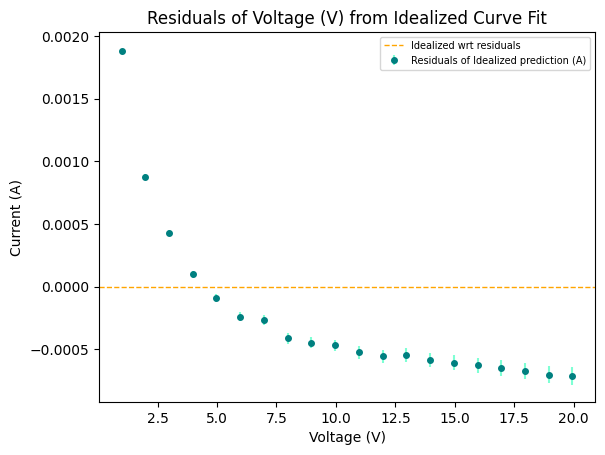

In [2089]:
# residuals
residuals = ampere_data - idealized(voltage_data, popti[0])


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Idealized prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Idealized wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Idealized Curve Fit')
plt.legend(fontsize=7)
plt.show()

## Question 7
Write a suitable caption that describes the plot. You should include a source for the dataset (it might be in the file you used), the meaning of each point or line on your plot, any quantities requested (mean, standard deviation) with appropriate units. Include the chi-square value in the caption for this plot.

## Question 8
Add any other details you think are important after this point.

In [2090]:
#Appendix